In [1]:
!pip install -q yfinance

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

sns.set(rc={'axes.facecolor': '#e9ecef', 'figure.facecolor': '#e9ecef'})
plt.style.use('fivethirtyeight')

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name

df = pd.concat(company_list, axis = 0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-09-05,175.000000,179.880005,175.000000,177.889999,177.889999,40170500,AMAZON
2024-09-06,177.240005,178.380005,171.160004,171.389999,171.389999,41466500,AMAZON
2024-09-09,174.529999,175.850006,173.509995,175.399994,175.399994,29037400,AMAZON
2024-09-10,177.490005,180.500000,176.789993,179.550003,179.550003,36233800,AMAZON
2024-09-11,180.100006,184.990005,175.729996,184.520004,184.520004,42564700,AMAZON
2024-09-12,184.800003,187.410004,183.539993,187.000000,187.000000,33622500,AMAZON
2024-09-13,187.000000,188.500000,185.910004,186.490005,186.490005,26495400,AMAZON
2024-09-16,185.289993,185.809998,183.360001,184.889999,184.889999,26065500,AMAZON
2024-09-17,186.850006,189.449997,186.139999,186.880005,186.880005,26091700,AMAZON


We can see that the data is numeric and the date is the index of the data. Notice that weekend is not included on the data

### Descriptive Statisticss about the Data

In [4]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,192.301508,194.083929,190.662143,192.472302,191.993482,5.871389e+07
std,19.345169,19.565419,18.892677,19.276508,19.459939,2.463082e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,175.577503,177.762501,174.195004,176.080002,175.524540,4.510405e+07
50%,188.735001,190.020004,187.409996,188.740005,188.146545,5.300555e+07
75%,208.077499,213.535000,206.952496,209.372501,209.130440,6.475430e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


We have 252 records in 1 year on our dataset

### Information about the Data

In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-09-19 to 2024-09-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## 1. What was the change in price of stock overtime?

### Closing Price

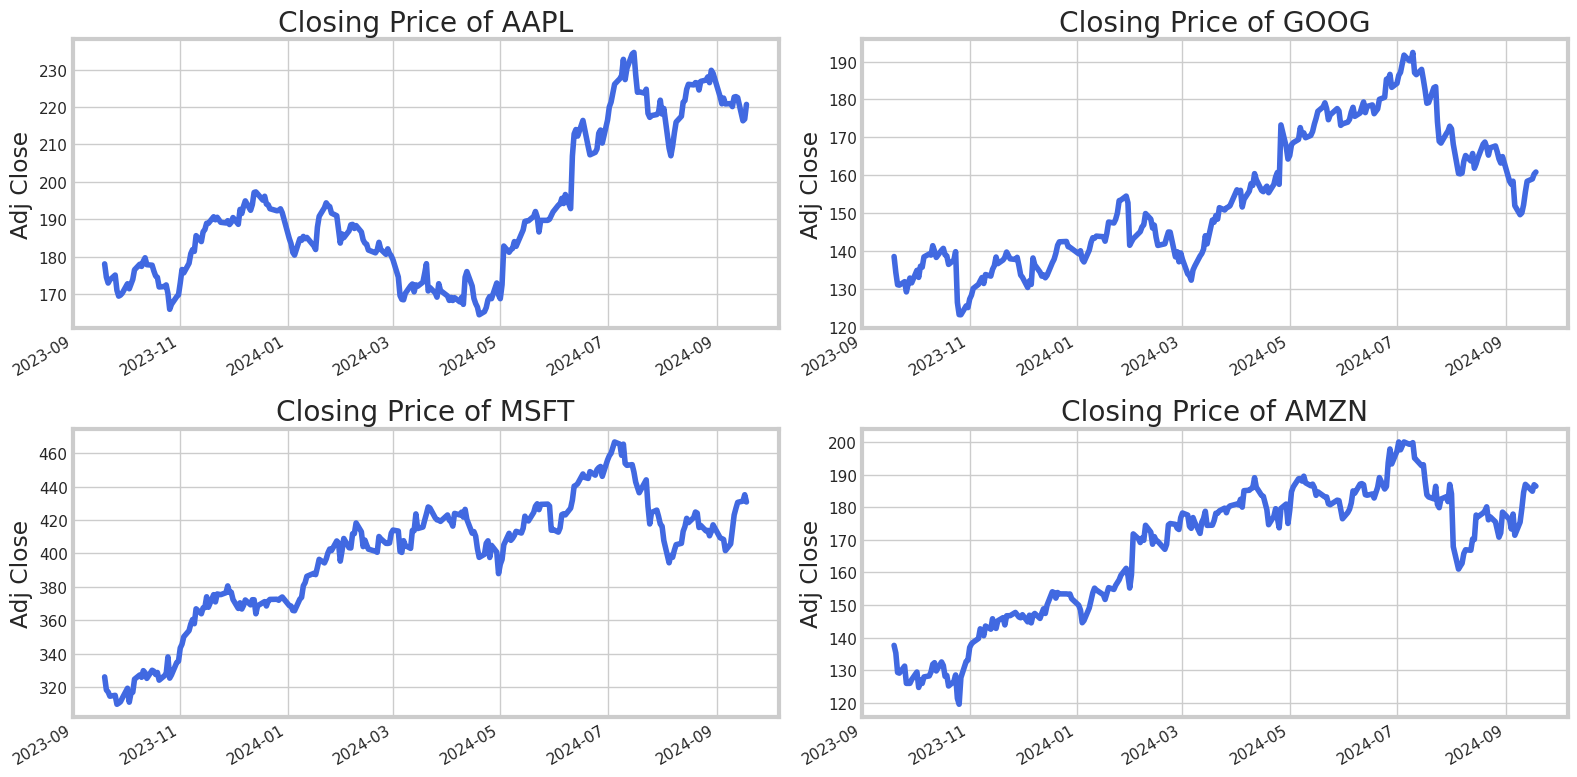

In [6]:
# sns.set(rc={'axes.facecolor': '#e9ecef', 'figure.facecolor': '#e9ecef'})
sns.set_style('whitegrid')

plt.figure(figsize = (16, 8))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color = 'royalblue')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {tech_list[i - 1]}')
    
plt.tight_layout()

### Volume of Sales

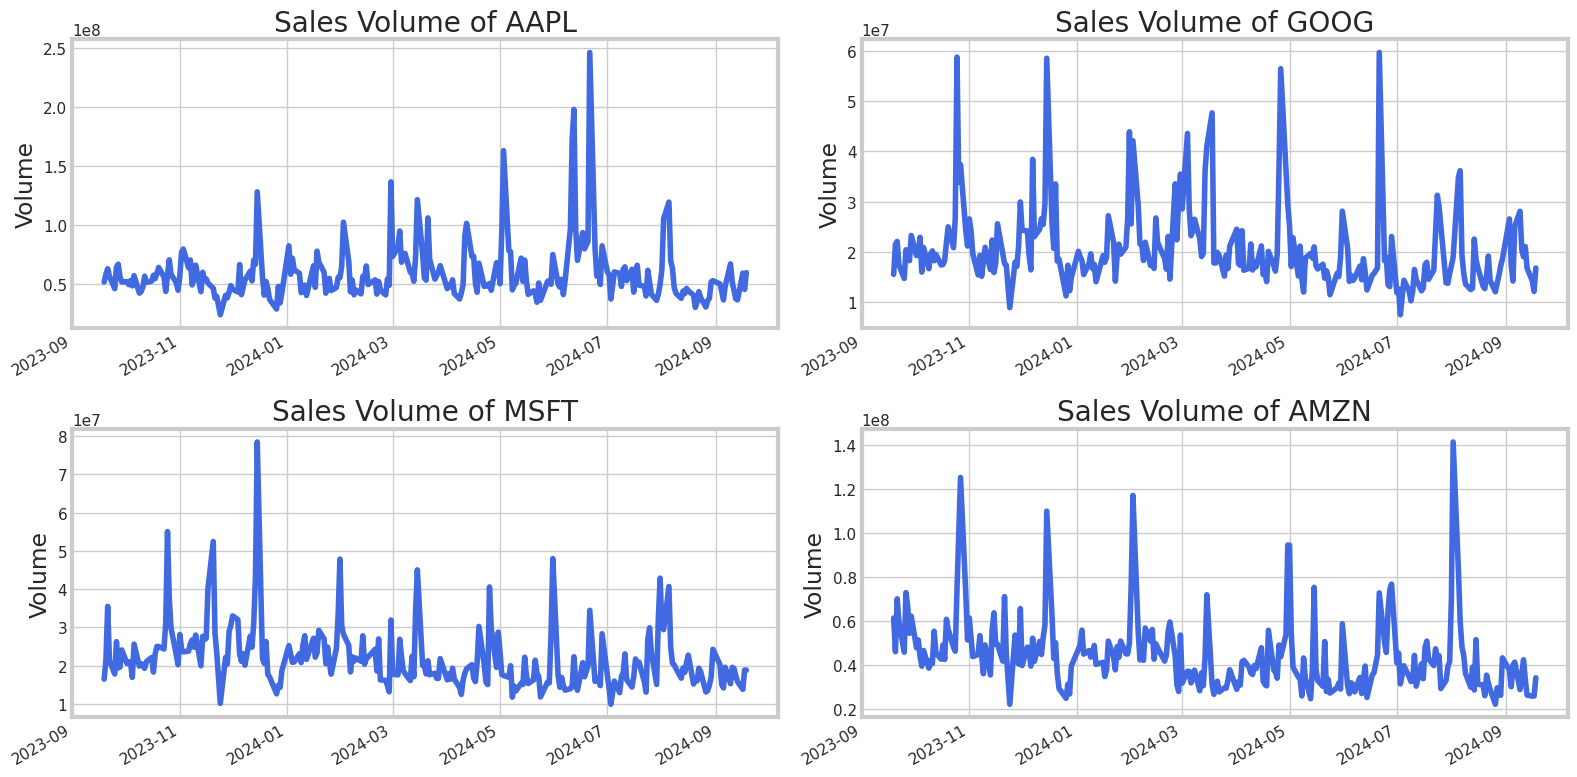

In [7]:
plt.figure(figsize = (16, 8))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color = 'royalblue')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'Sales Volume of {tech_list[i - 1]}')
    
plt.tight_layout()

## What was the moving average of the various stocks?

Text(0.5, 1.0, 'AMAZON')

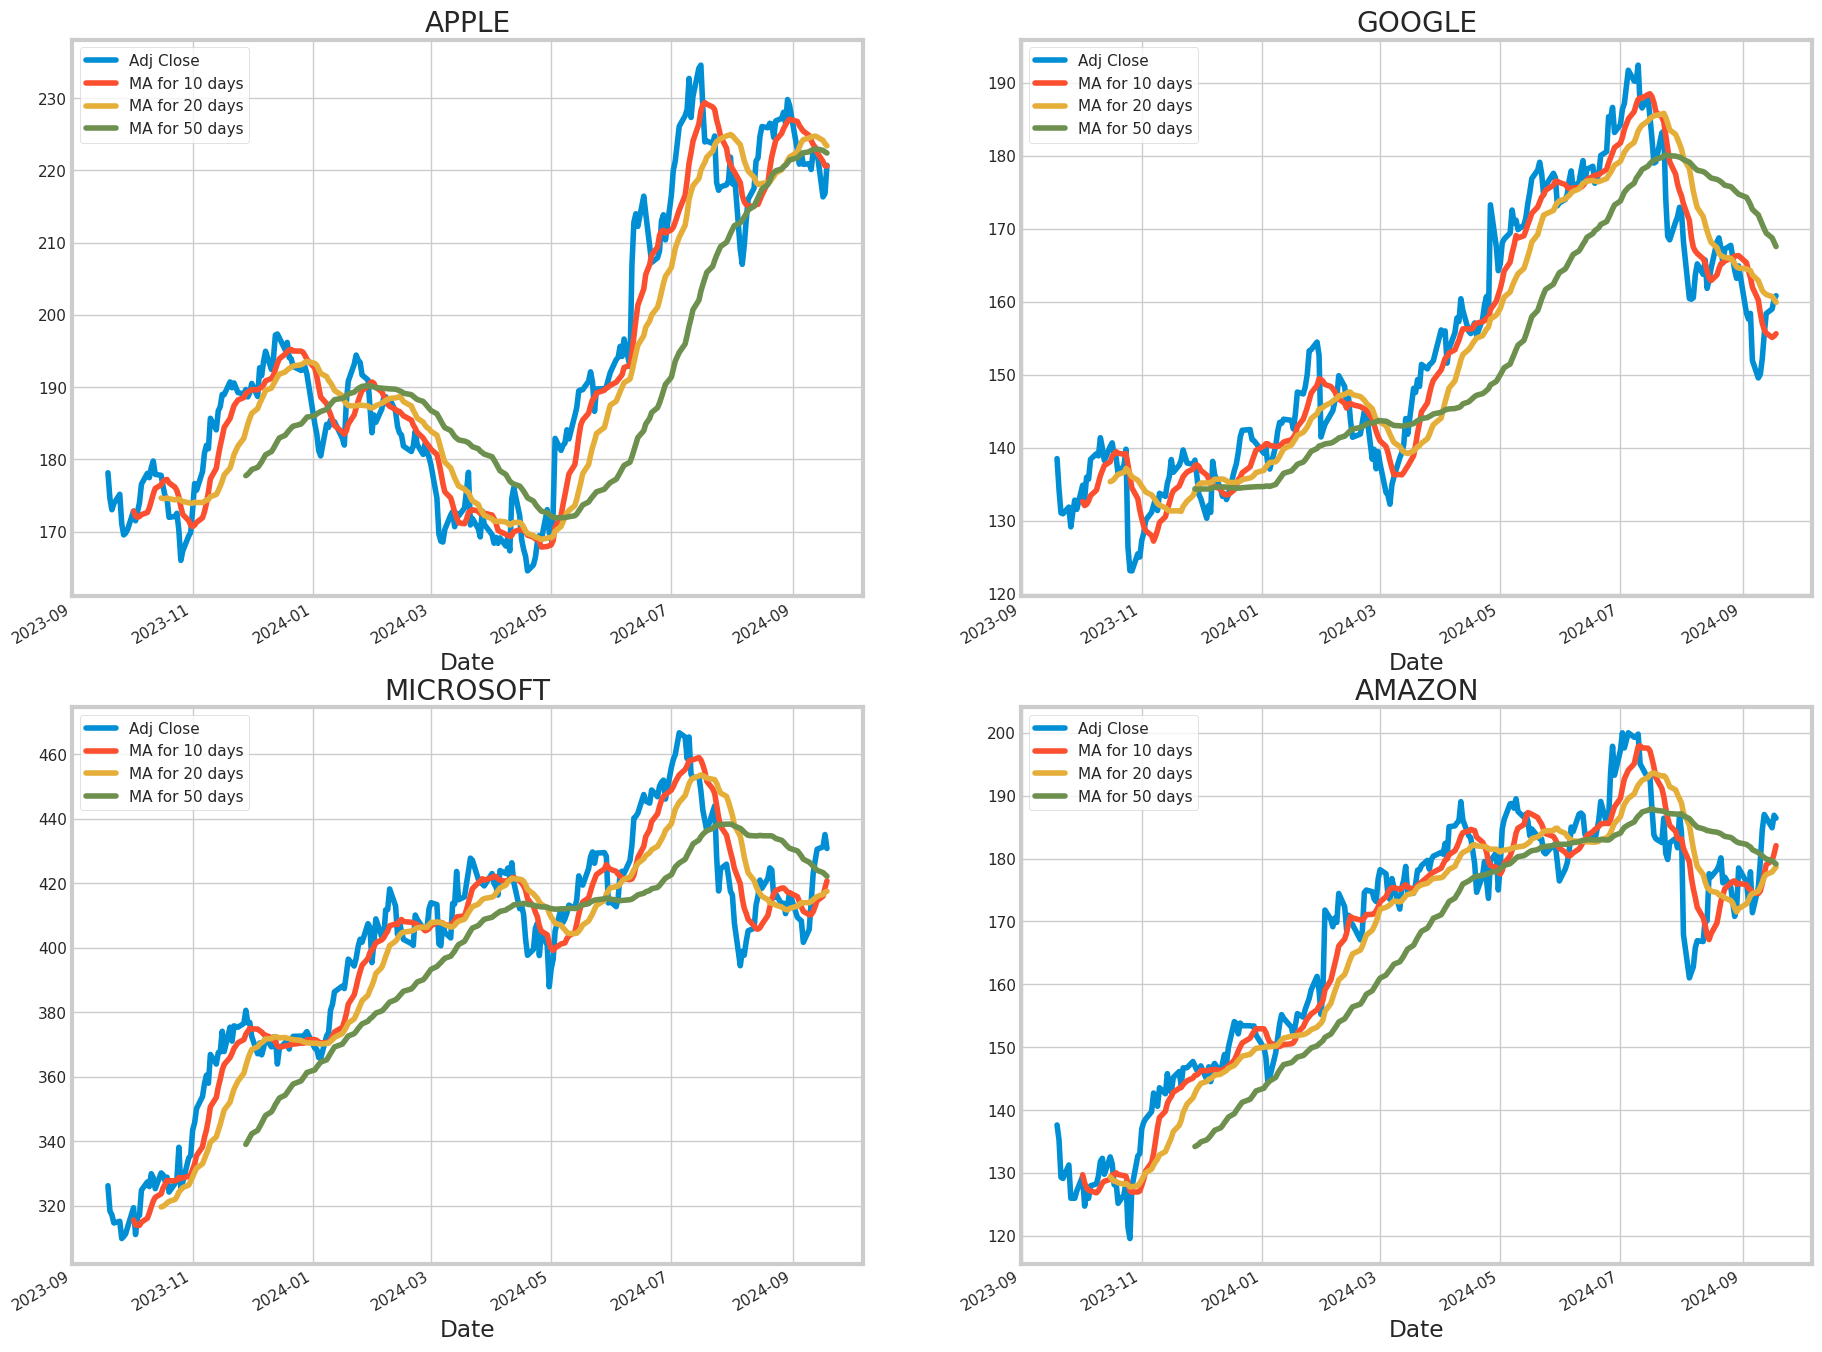

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 18))

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0, 0])
axes[0, 0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0, 1])
axes[0, 1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1, 1])
axes[1, 1].set_title('AMAZON')

Here we can see that the best values to measure the MA is 10 and 20 days

## What was the daily return of the stock on average

Text(0.5, 1.0, 'AMZN')

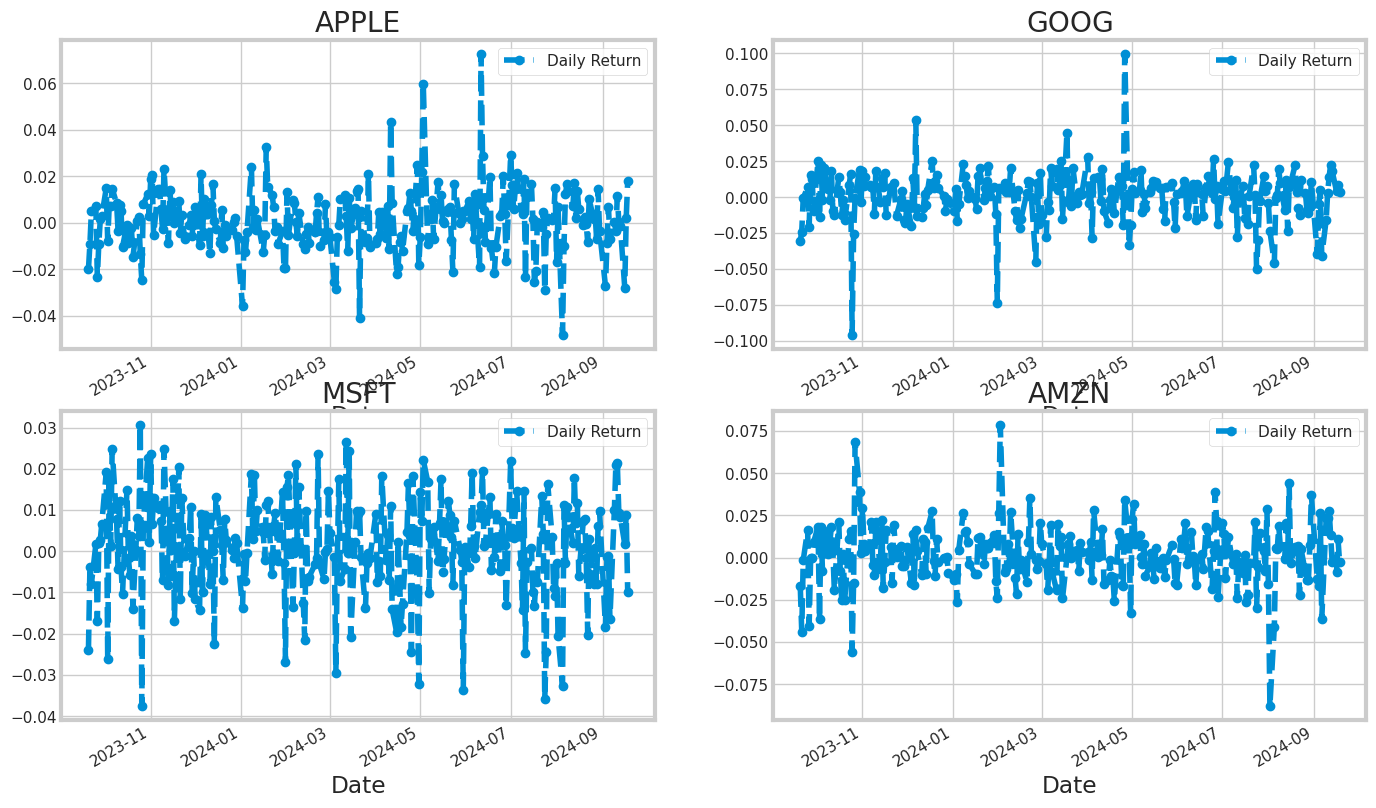

In [9]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

AAPL['Daily Return'].plot(ax = axes[0, 0], legend = True, linestyle = '--', marker = 'o')
axes[0, 0].set_title('APPLE')

GOOG['Daily Return'].plot(ax = axes[0, 1], legend = True, linestyle = '--', marker = 'o')
axes[0, 1].set_title('GOOG')

MSFT['Daily Return'].plot(ax = axes[1, 0], legend = True, linestyle = '--', marker = 'o')
axes[1, 0].set_title('MSFT')

AMZN['Daily Return'].plot(ax = axes[1, 1], legend = True, linestyle = '--', marker = 'o')
axes[1, 1].set_title('AMZN')

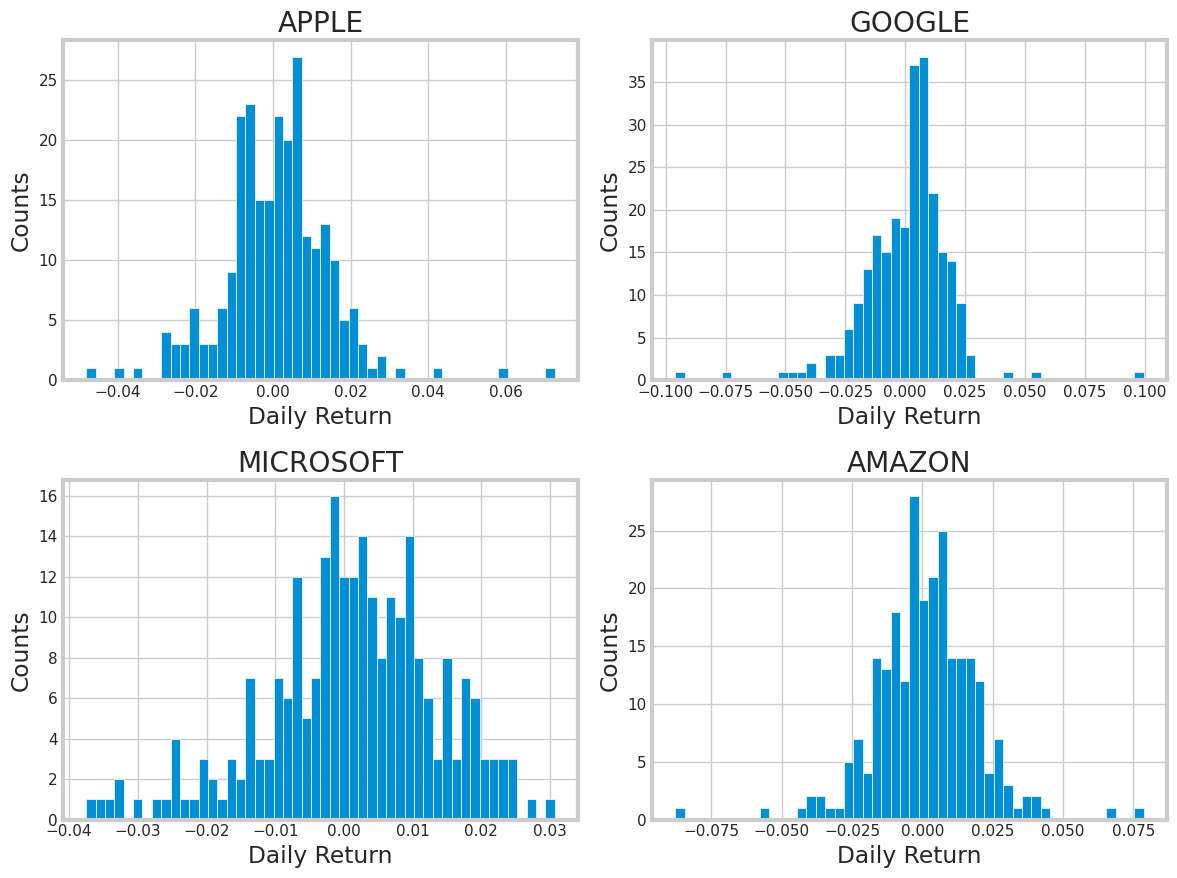

In [10]:
plt.figure(figsize = (12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins = 50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## What was the correlation between different stocks closing price?

In [11]:
closing_df = yf.download(tech_list, start = start, end = end)['Adj Close']
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-09-19 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-09-20 00:00:00+00:00,-0.019992,-0.017002,-0.030541,-0.023977
2023-09-21 00:00:00+00:00,-0.008889,-0.044053,-0.023999,-0.003866
2023-09-22 00:00:00+00:00,0.004944,-0.001624,-0.000837,-0.007886
2023-09-25 00:00:00+00:00,0.007380,0.016651,0.007009,0.001672


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


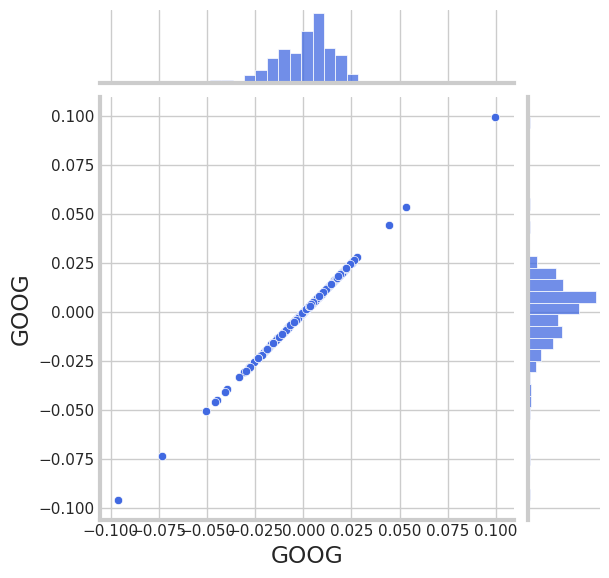

In [12]:
sns.jointplot(x = 'GOOG', y = 'GOOG', data = tech_rets, kind = 'scatter', color = 'royalblue')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


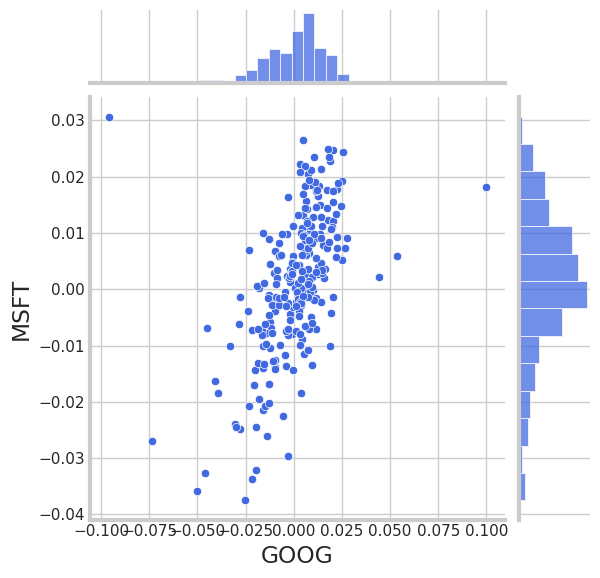

In [13]:
sns.jointplot(x = 'GOOG', y = 'MSFT', data = tech_rets, kind = 'scatter', color = 'royalblue')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

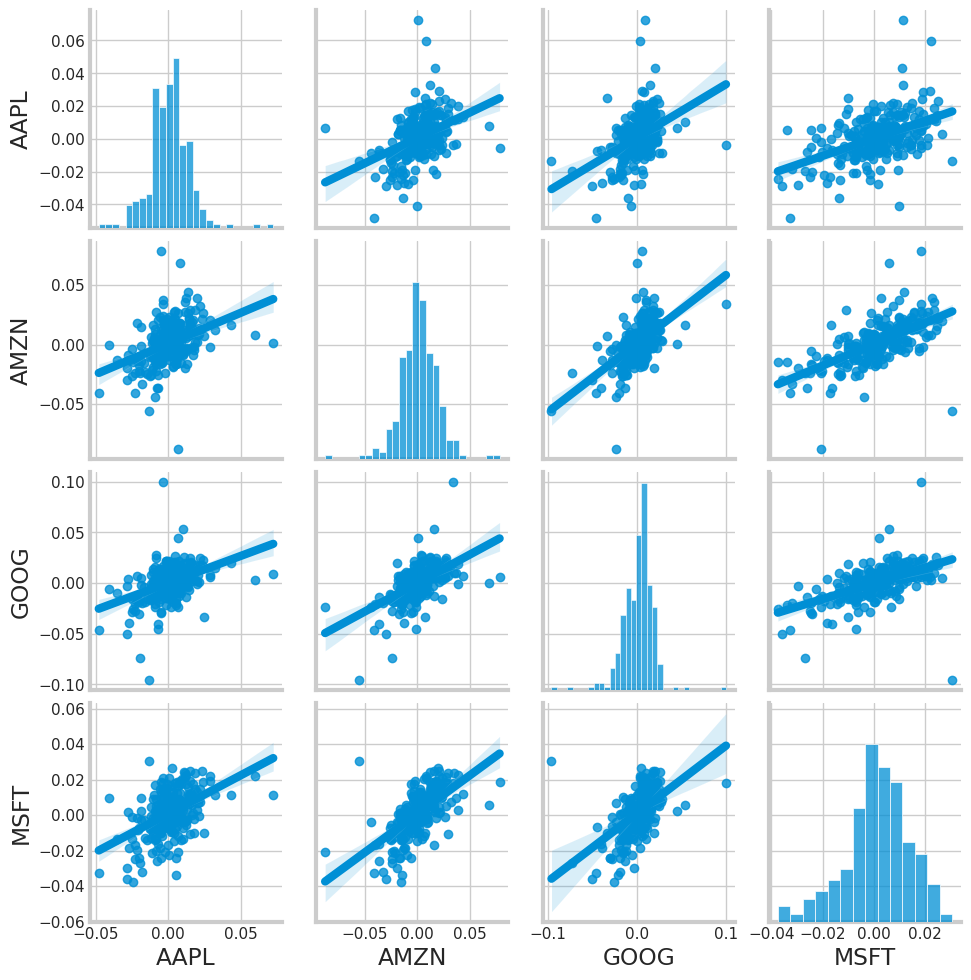

In [14]:
sns.pairplot(data = tech_rets, kind = 'reg')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

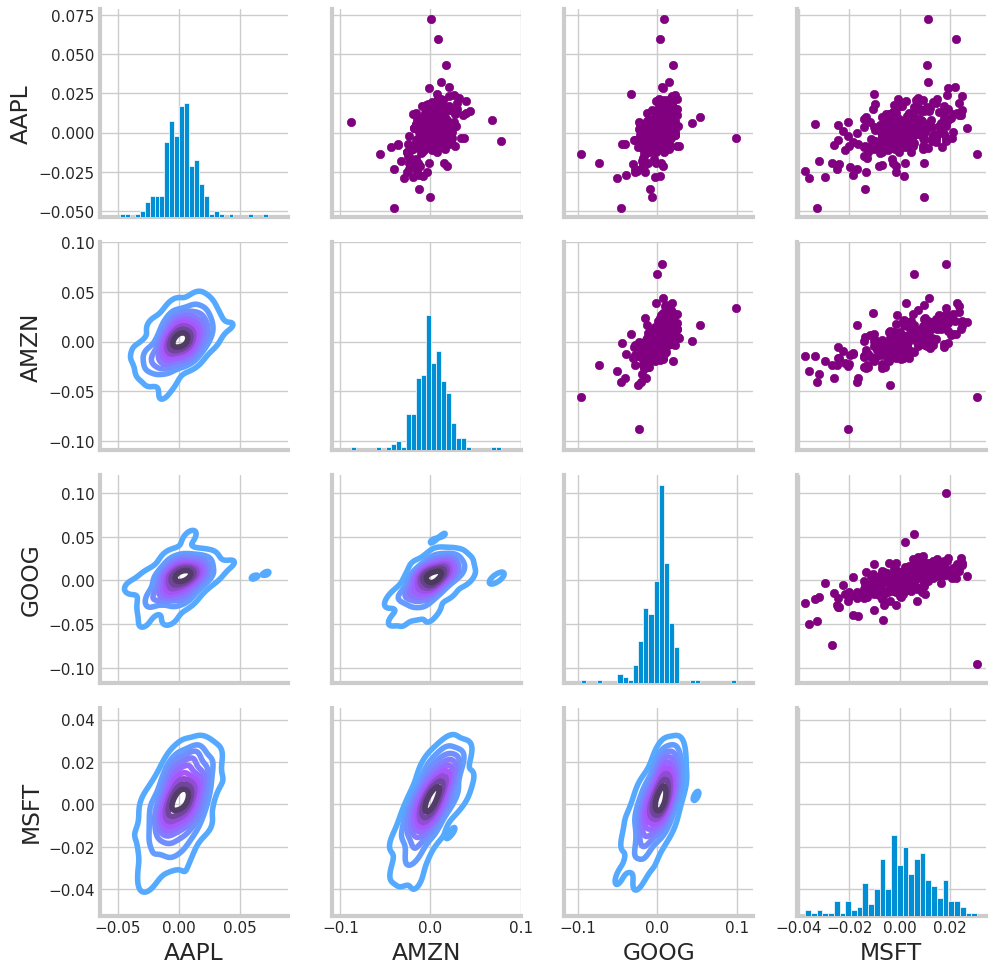

In [15]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color = 'purple')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

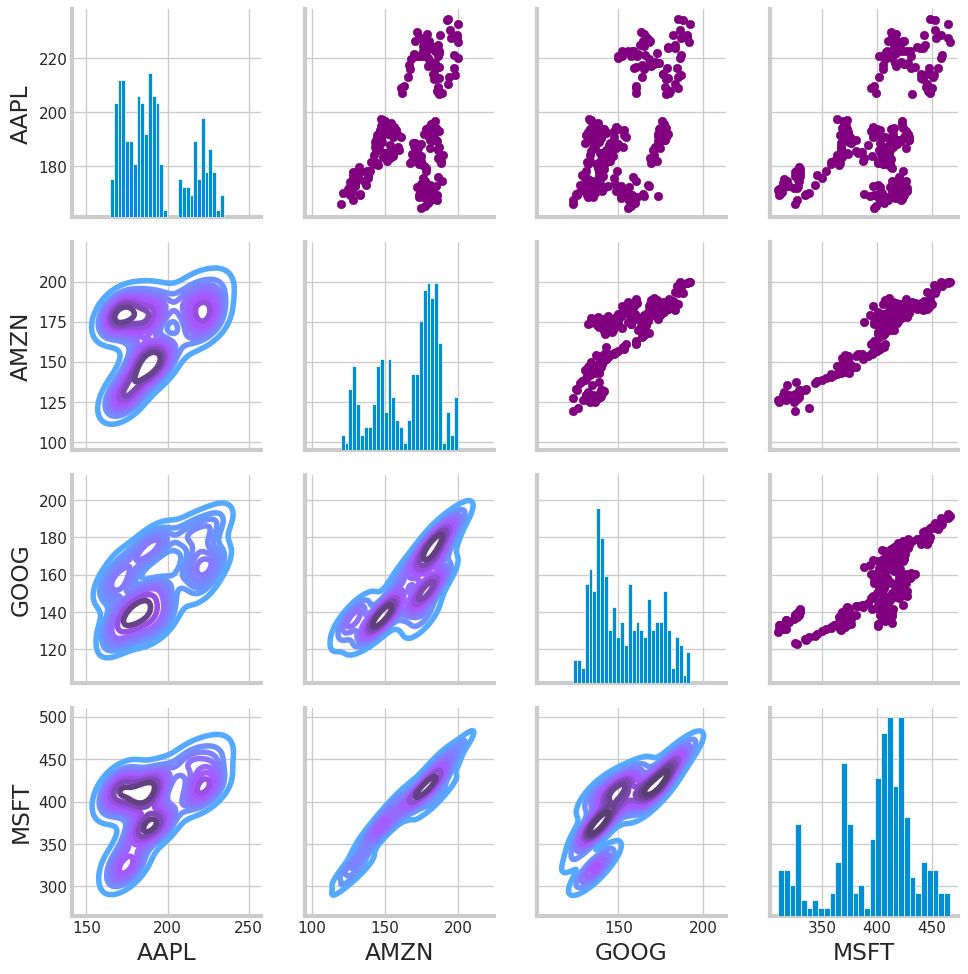

In [16]:
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter, color = 'purple')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

Text(0.5, 1.0, 'Correlation of Stock Closing Price')

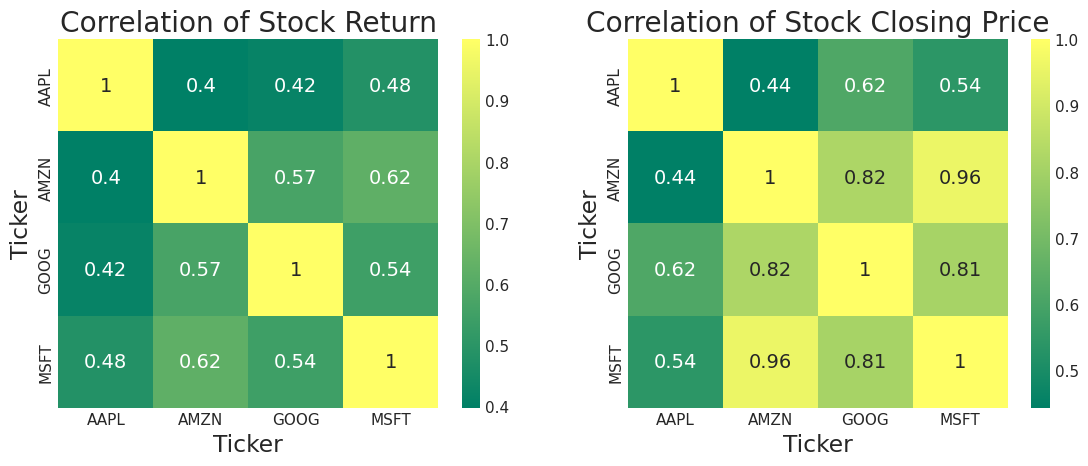

In [17]:
plt.figure(figsize = (12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot = True, cmap = 'summer')
plt.title('Correlation of Stock Return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot = True, cmap = 'summer')
plt.title('Correlation of Stock Closing Price')

## How much value do we put at risk by investing in a particular stock?

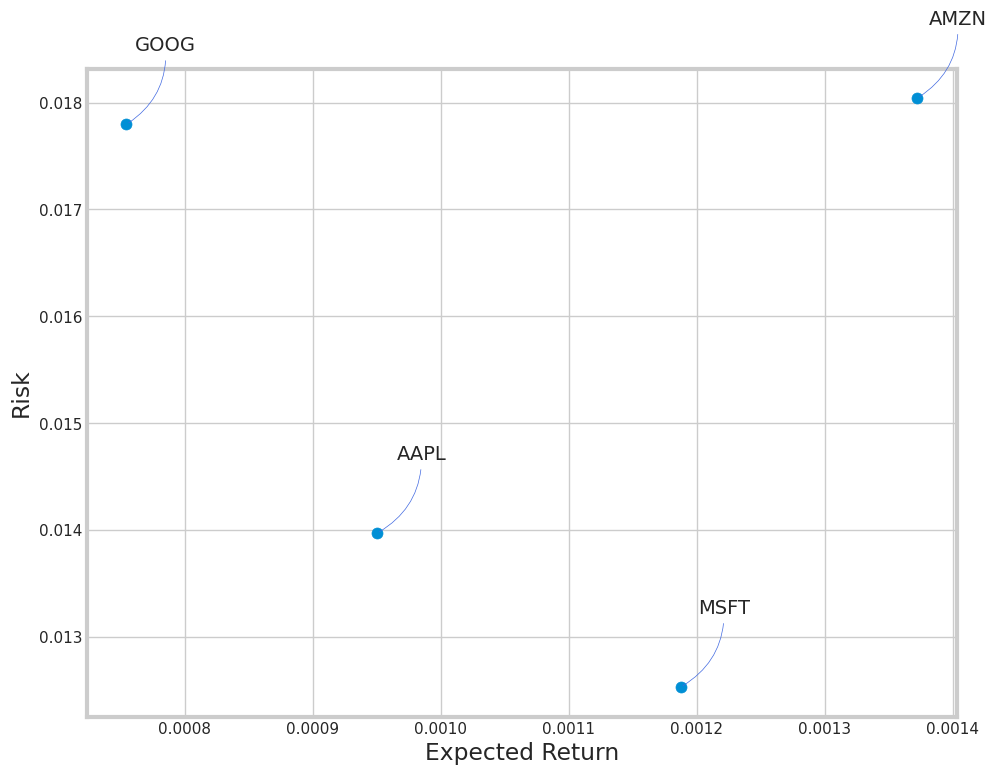

In [27]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize = (10, 8))
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy = (x, y), xytext = (50, 50), textcoords = 'offset points', 
                ha = 'right', va = 'bottom', arrowprops = dict(arrowstyle = '-',
                                                              color = 'royalblue',
                                                              connectionstyle = 'arc3,rad=-0.3'))

## Predicting the closing price stock price of APPLE inc:

In [29]:
df = yf.download('AAPL', start = '2012-01-01', end = datetime.now())

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402627,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469280,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607714,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739513,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719301,394024400
...,...,...,...,...,...,...
2024-09-12,222.500000,223.550003,219.820007,222.770004,222.770004,37498200
2024-09-13,223.580002,224.039993,221.910004,222.500000,222.500000,36766600
2024-09-16,216.539993,217.220001,213.919998,216.320007,216.320007,59357400


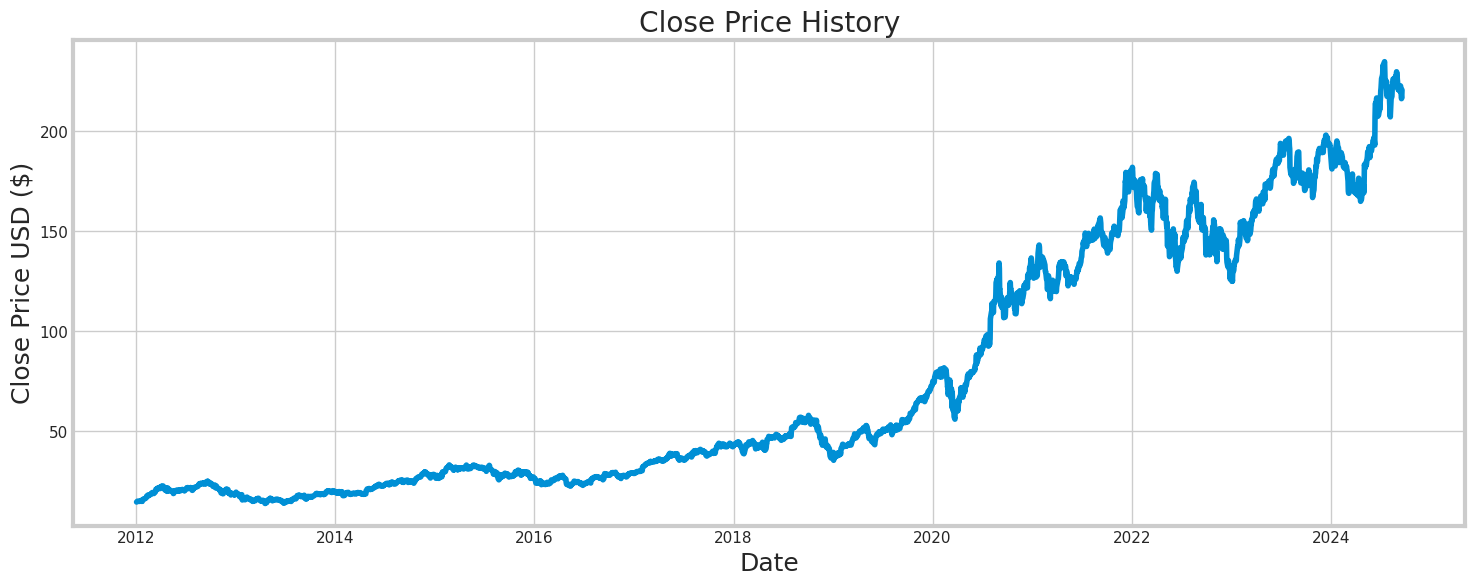

In [30]:
plt.figure(figsize = (16, 6))

plt.plot(df['Close'])
plt.title('Close Price History')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [31]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.95))

training_data_len

3039

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.91624127],
       [0.91836913],
       [0.93602642]])

In [39]:
train_data = scaled_data[0: int(training_data_len), :]

X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])
    
    if i <= 61:
        print(X_train)
        print(y_train)
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]
[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.004

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 1, epochs = 1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2979/2979 ━━━━━━━━━━━━━━━━━━━━ 121s 40ms/step - loss: 0.0023


In [41]:
test_data = scaled_data[training_data_len - 60:, :]

X_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60: i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


4.828637255870663

/tmp/ipykernel_36/1553043484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


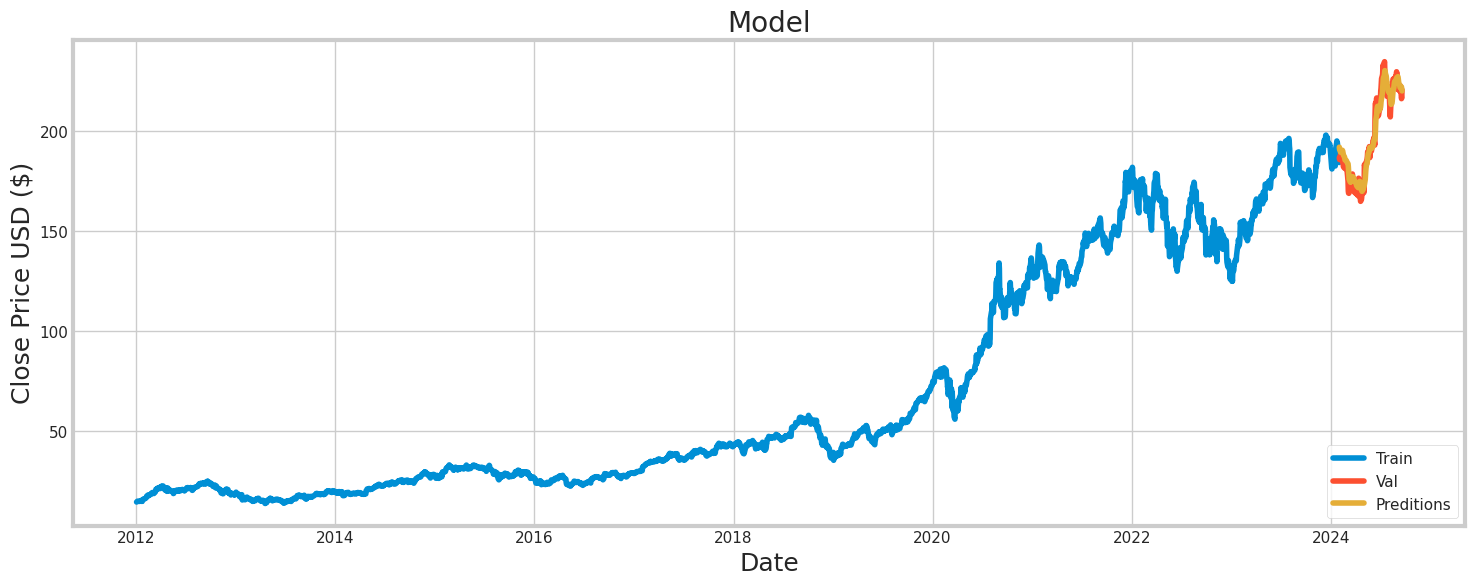

In [44]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Preditions'], loc = 'lower right')
plt.show()

In [45]:
valid

,Close,Predictions
Date,,
2024-02-01,186.860001,192.067291
2024-02-02,185.850006,190.885834
2024-02-05,187.679993,189.903442
2024-02-06,189.300003,189.524551
2024-02-07,189.410004,189.721603
...,...,...
2024-09-12,222.770004,221.782181
2024-09-13,222.500000,221.977890
2024-09-16,216.320007,222.179001
